In [1]:
import os
import numpy as np
from skimage.io import imread
from skimage import filters
from skimage.feature import peak_local_max
import matplotlib.pyplot as plt

In [2]:
working_dir = '/Users/qihou/Downloads'
img_path = os.path.join(working_dir, 'NeuN.tif')
img = imread(img_path)
img.shape

(64, 9110, 3702)

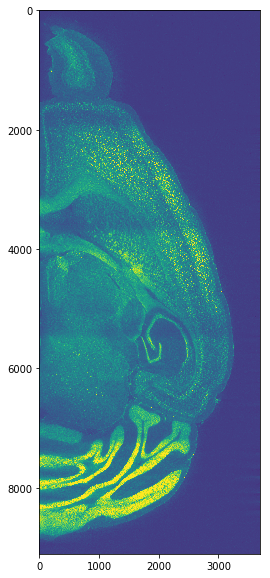

In [7]:
#zslice = img[0]
#zslice.shape
img = img[32]
plt.figure(figsize=(10, 10))
plt.imshow(img, clim=[0, 150])

## Blur and crop the image

In [8]:
img.shape

(9110, 3702)

In [9]:
img_crop = img[2500:3000, 1700:2200]
img_blurred = filters.gaussian(img_crop, sigma=3)
img_crop.shape

(500, 500)

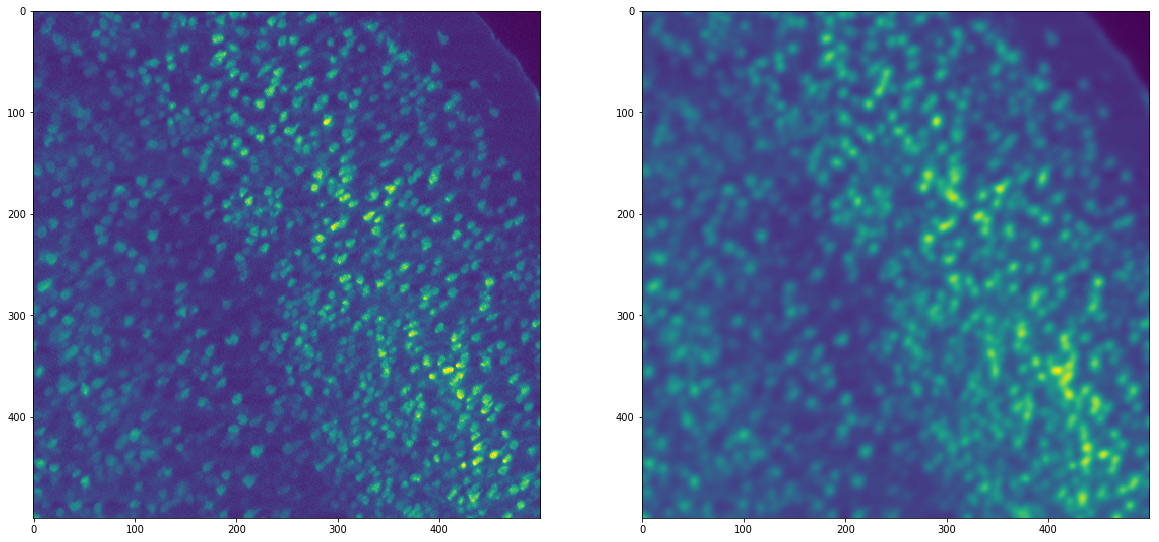

In [7]:
plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.imshow(img_crop)

plt.subplot(1, 2, 2)
plt.imshow(img_blurred)

plt.show()

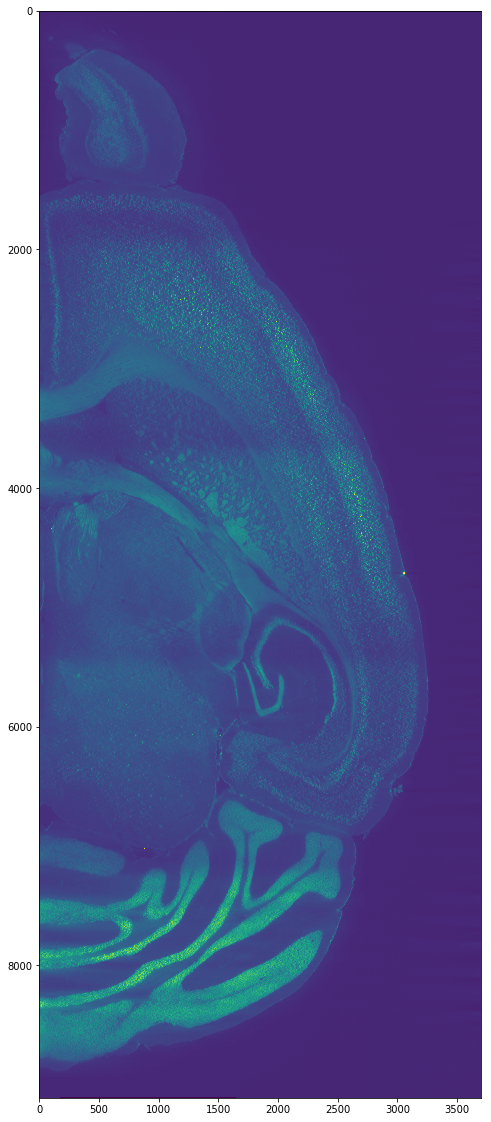

In [18]:
#image_denoised = filters.median(image, selem=np.ones((5,5)) 
                               )
#plt.figure(figsize=(20,20))
#plt.imshow(image_denoised)

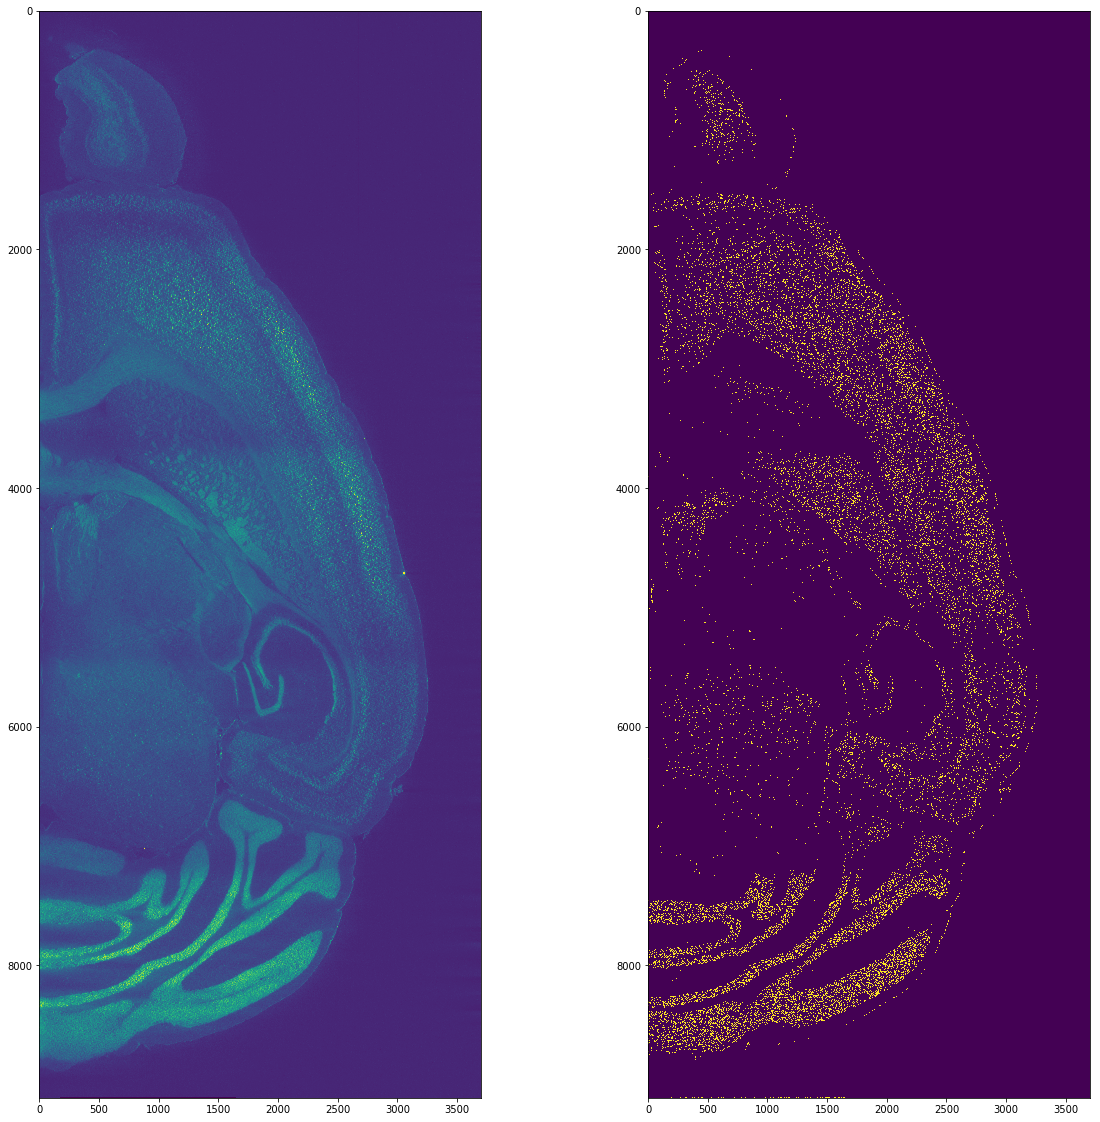

In [30]:
#import skimage
#from skimage import feature
#edges = skimage.feature.canny(image, sigma=0.8)

#f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,20))
#ax0.imshow(image)
#ax1.imshow(edges);

In [20]:
#points_1 = peak_local_max(img_crop)
#points_2 = peak_local_max(img_blurred)
#points_1.shape, points_2.shape

((307878, 3), (2492, 3))

In [22]:
#img_points = np.zeros(img_crop.shape, img_crop.dtype)
#img_points[points_2[:, 0], points_2[:, 1], points_2[:, 2]] = 255
#img_points.shape

(64, 500, 500)

In [23]:
#from ipywidgets import interactive
#%matplotlib inline

### Detect Blobs

In [4]:
from skimage import data, feature, exposure
from skimage.color import rgb2gray

In [21]:
img_gray = rgb2gray(img_crop)
#img_gray = exposure.equalize_hist(img_gray)  # improves detection
points = feature.blob_log(img_gray, threshold = .09) # decrease threshold to detect blob with less intensity
points = points.astype(int)
points.shape

(286, 3)

In [22]:
img_points = np.zeros(img_crop.shape, img_crop.dtype)
img_points[points[:,0], points[:,1]] = 255

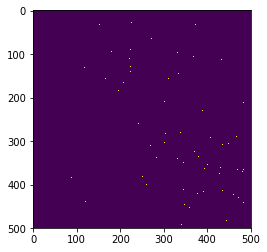

In [17]:
plt.imshow(img_points)
plt.show()

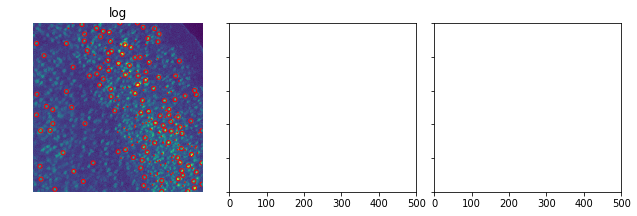

In [12]:
blobs_dog = feature.blob_dog(img_gray, max_sigma=30, threshold=.1)
blobs_doh = feature.blob_doh(img_gray, max_sigma=30, threshold=.01)

blobs_list = [points, blobs_dog, blobs_doh]
titles = ['log', 'dog','doh']
colors = 'r'
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(img_gray)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color='r', linewidth=1, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

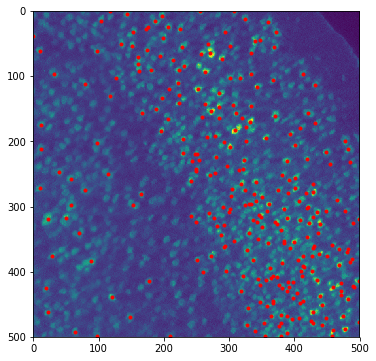

In [35]:
plt.figure(figsize=(6, 6))
plt.imshow(img_crop)
plt.plot(points[:, 1], points[:, 0], 'r.')
plt.show()

In [142]:
np.save(os.path.join(working_dir, 'roi.npy'), img)
np.save(os.path.join(working_dir, 'points.npy'), points)

### Extract boxes around each cell

In [24]:
from tqdm import tqdm_notebook as tqdm

In [32]:
patch_size = np.asarray((20,20,0))
patches = [] 
for i, point in tqdm(enumerate(points), total = len(points)):
    start = np.asarray(point) - patch_size // 2
    stop = start + patch_size
    patch = img[start[0]:stop[0], start[1]:stop[1]]
    patches.append(patch)
patches = np.asarray(patches)
patches.shape

(286,)

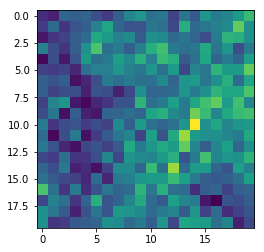

In [33]:
plt.imshow(patches[1])
plt.show()